#  Laptop Price Analysis - Exploratory Data Analysis (EDA)
**Author:** PAWAN KHOT  
**Date:** 2025-05-15  

This notebook performs EDA (Exploratory Data Analysis) on the cleaned laptop dataset.

In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='pastel')



In [ ]:
# 📥 Load Dataset
df = pd.read_csv("laptop_prices_transformed.csv")
print(" Dataset loaded. Shape:", df.shape)
display(df.head())

✅ Dataset loaded. Shape: (1275, 24)


,company,product,typename,inches,ram,os,weight,price_euros,screen,screenw,...,cpu_company,cpu_freq,cpu_model,primarystorage,secondarystorage,primarystoragetype,secondarystoragetype,gpu_company,gpu_model,totalstorage
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Intel,2.3,Core i5,0,0,SSD,No,Intel,Iris Plus Graphics 640,0
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,Intel,1.8,Core i5,0,0,Flash Storage,No,Intel,HD Graphics 6000,0
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,Intel,2.5,Core i5 7200U,0,0,SSD,No,Intel,HD Graphics 620,0
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Intel,2.7,Core i7,0,0,SSD,No,AMD,Radeon Pro 455,0
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Intel,3.1,Core i5,0,0,SSD,No,Intel,Iris Plus Graphics 650,0


##  Basic Info and Summary

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               1275 non-null   object 
 1   product               1275 non-null   object 
 2   typename              1275 non-null   object 
 3   inches                1275 non-null   float64
 4   ram                   1275 non-null   int64  
 5   os                    1275 non-null   object 
 6   weight                1275 non-null   float64
 7   price_euros           1275 non-null   float64
 8   screen                1275 non-null   object 
 9   screenw               1275 non-null   int64  
 10  screenh               1275 non-null   int64  
 11  touchscreen           1275 non-null   object 
 12  ipspanel              1275 non-null   object 
 13  retinadisplay         1275 non-null   object 
 14  cpu_company           1275 non-null   object 
 15  cpu_freq             

In [12]:
df.describe()

,inches,ram,weight,price_euros,screenw,screenh,cpu_freq,primarystorage,secondarystorage,totalstorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.0,1275.0,1275.0
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,0.0,0.0,0.0
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,0.0,0.0,0.0
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,0.0,0.0,0.0
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,0.0,0.0,0.0
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,0.0,0.0,0.0
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,0.0,0.0,0.0
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,0.0,0.0,0.0


## Pie Charts for Categorical Features

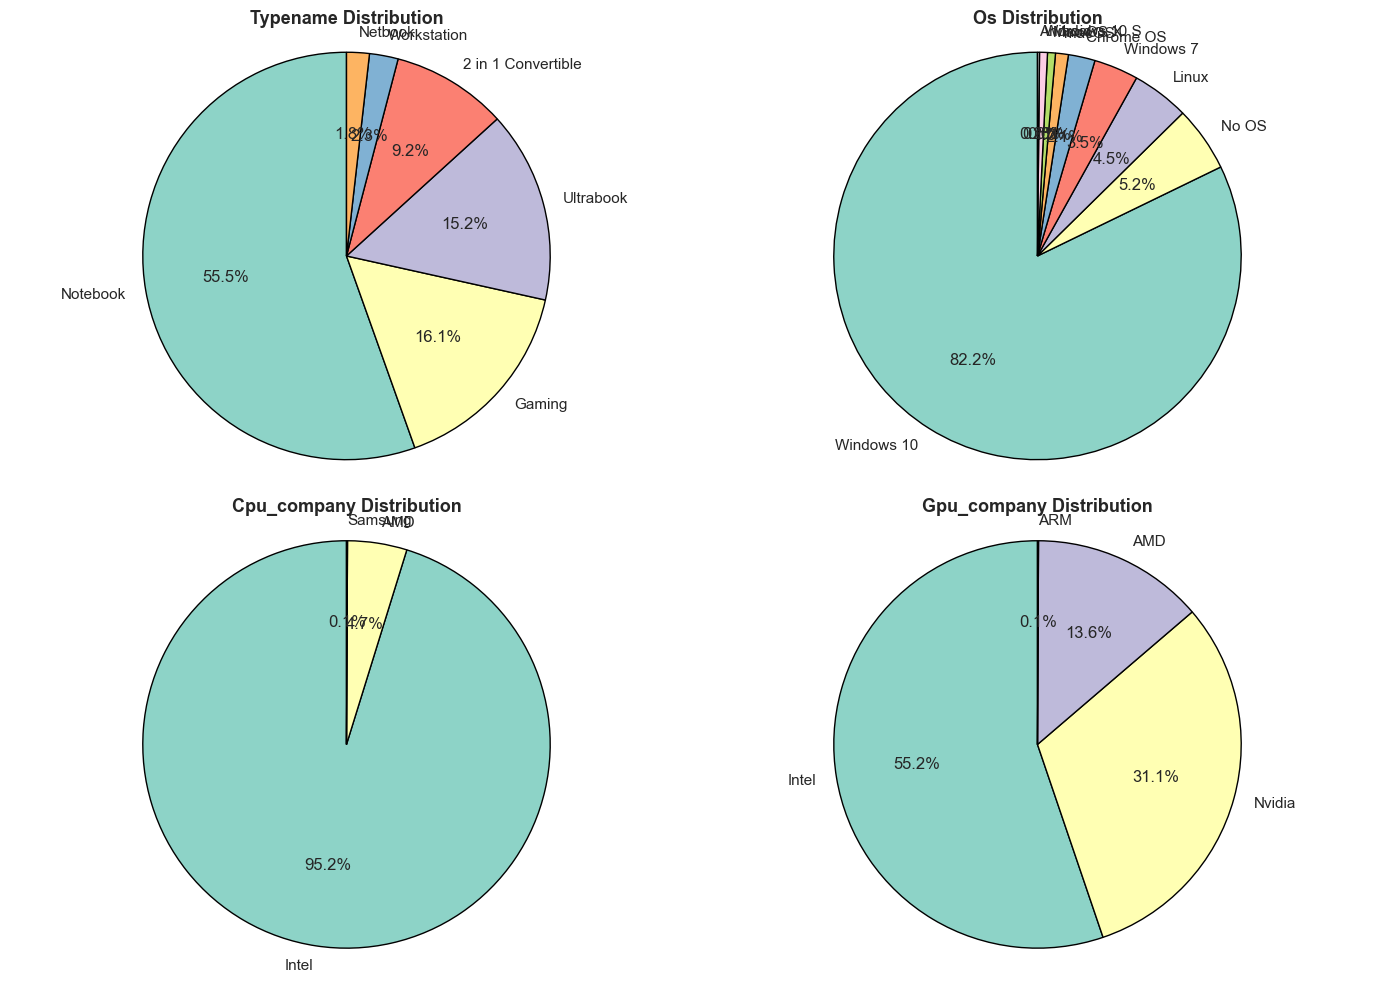

In [14]:
# --- Section: Pie Charts for Categorical Features ---
categorical_features = ['typename', 'os', 'cpu_company', 'gpu_company']
n = len(categorical_features)
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(14, rows * 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, cols, i)
    counts = df[feature].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
            wedgeprops={'edgecolor': 'black'}, colors=plt.colormaps['Set3'].colors)
    plt.title(f'{feature.capitalize()} Distribution', fontsize=13, weight='bold')
    plt.axis('equal')
plt.tight_layout()
plt.show()

##  Distribution of Key Numerical Features

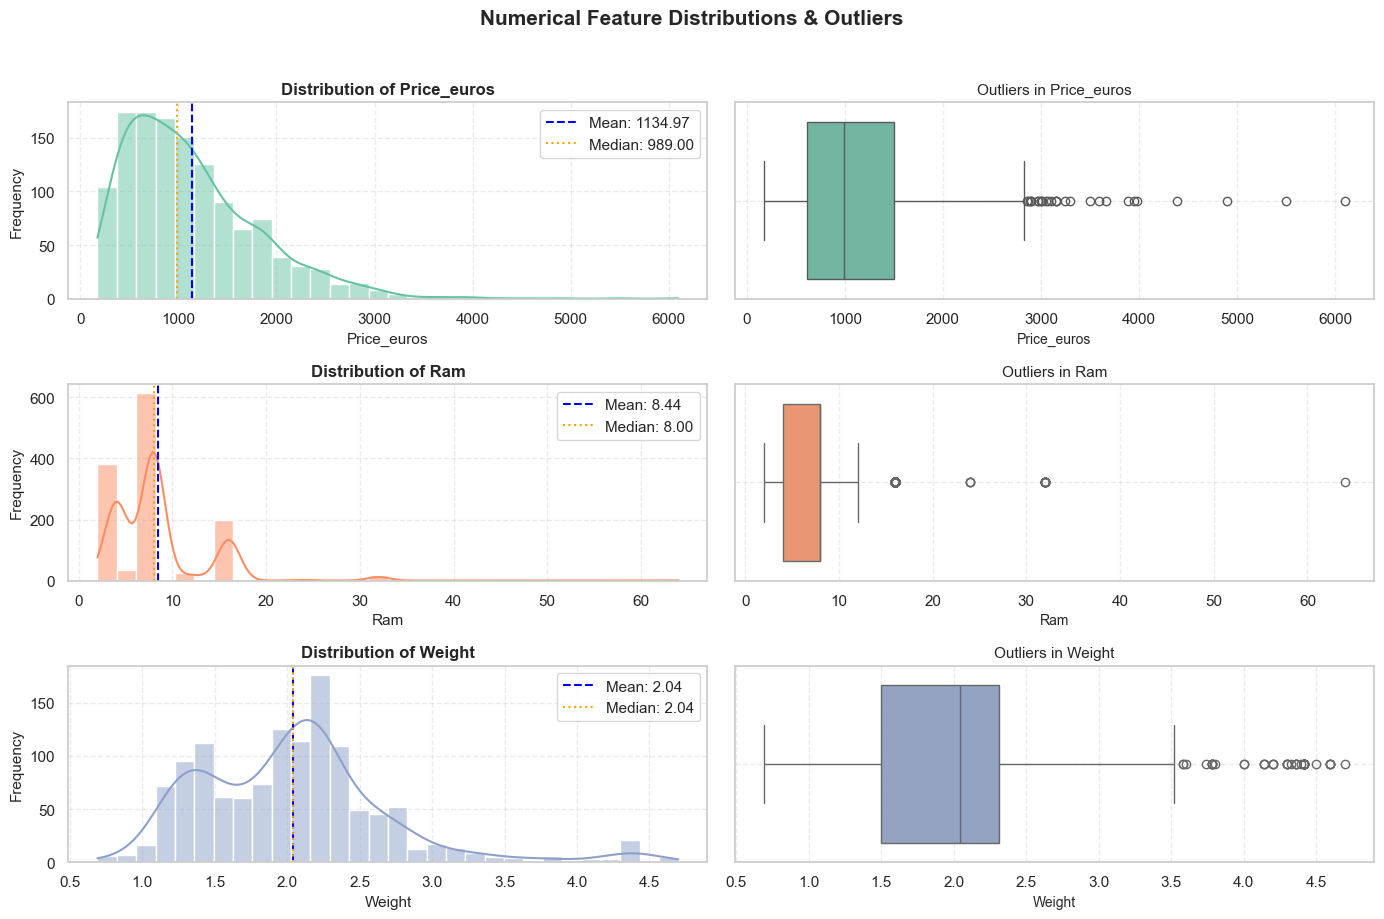

In [ ]:

numerical_features = ['price_euros', 'ram', 'weight']
n = len(numerical_features)
cols = 2
rows = int(np.ceil(n * 2 / cols))

colors = plt.colormaps['Set2']

plt.figure(figsize=(14, rows * 3))
for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, 2*i+1)
    sns.histplot(df[feature], kde=True, bins=30, color=colors(i))
    mean = df[feature].mean()
    median = df[feature].median()
    plt.axvline(mean, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='orange', linestyle=':', linewidth=1.5, label=f'Median: {median:.2f}')
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=12, weight='bold')
    plt.xlabel(feature.capitalize(), fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)

    plt.subplot(rows, cols, 2*i+2)
    sns.boxplot(x=df[feature], color=colors(i))
    plt.title(f'Outliers in {feature.capitalize()}', fontsize=11)
    plt.xlabel(feature.capitalize(), fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.4)
plt.suptitle("Numerical Feature Distributions & Outliers", fontsize=15, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Scatter Plot - Price vs RAM by Company

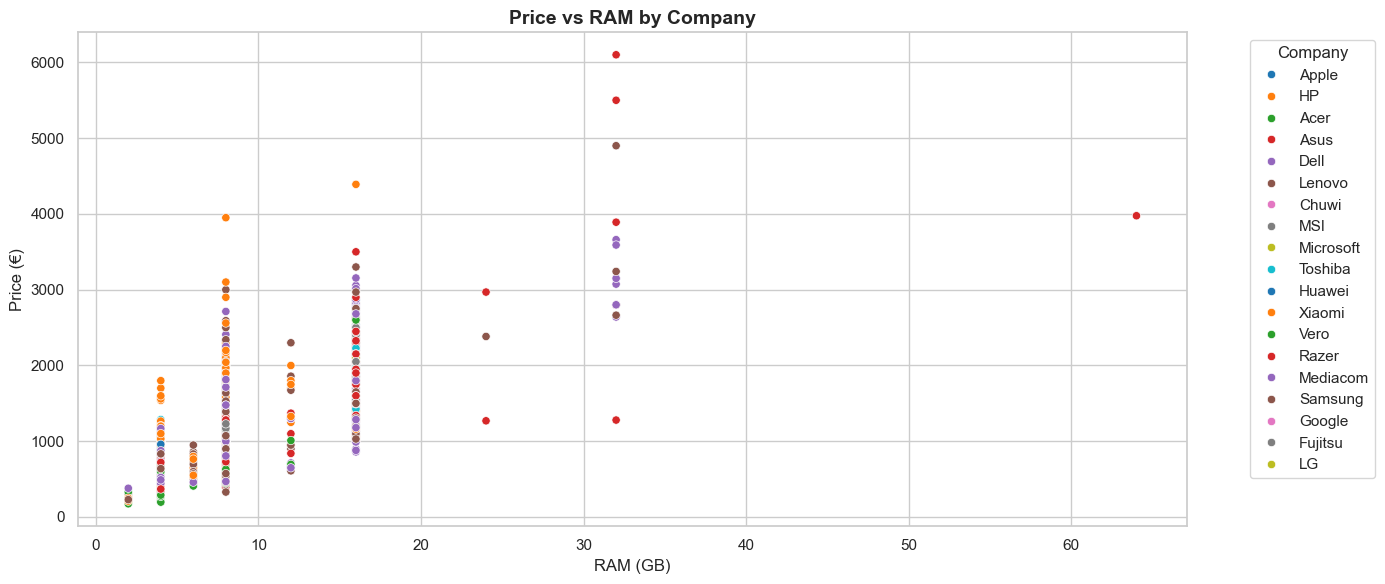

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='ram', y='price_euros', hue='company', data=df, palette='tab10')
plt.title("Price vs RAM by Company", fontsize=14, weight='bold')
plt.xlabel("RAM (GB)", fontsize=12)
plt.ylabel("Price (€)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Company')
plt.tight_layout()
plt.show()

## Boxplot - Price by Company (Candlestick Style)

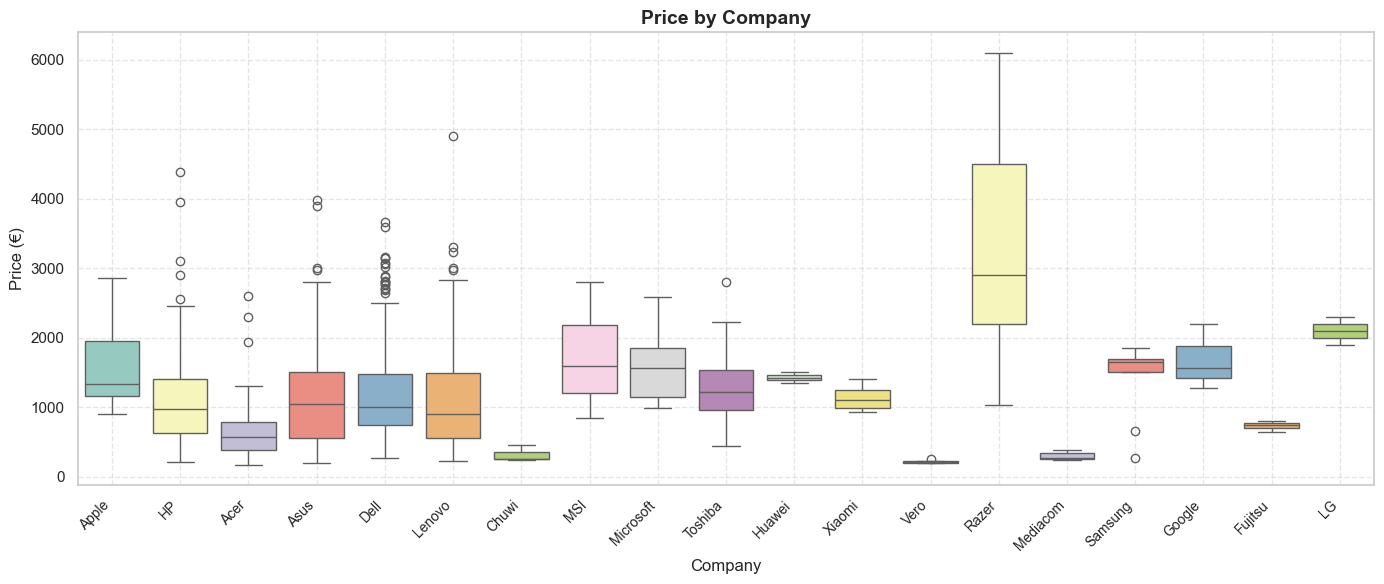

In [ ]:
if 'company' in df.columns and 'price_euros' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(
        x='company',
        y='price_euros',
        data=df,
        hue='company',           # Assign hue to match x for color
        palette='Set3',
        dodge=False,
        legend=False             # Hide duplicate legend
    )
    plt.title("Price by Company", fontsize=14, weight='bold')
    plt.xlabel("Company", fontsize=12)
    plt.ylabel("Price (€)", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print(" Required columns 'company' or 'price_euros' are missing!")

##  Correlation Heatmap

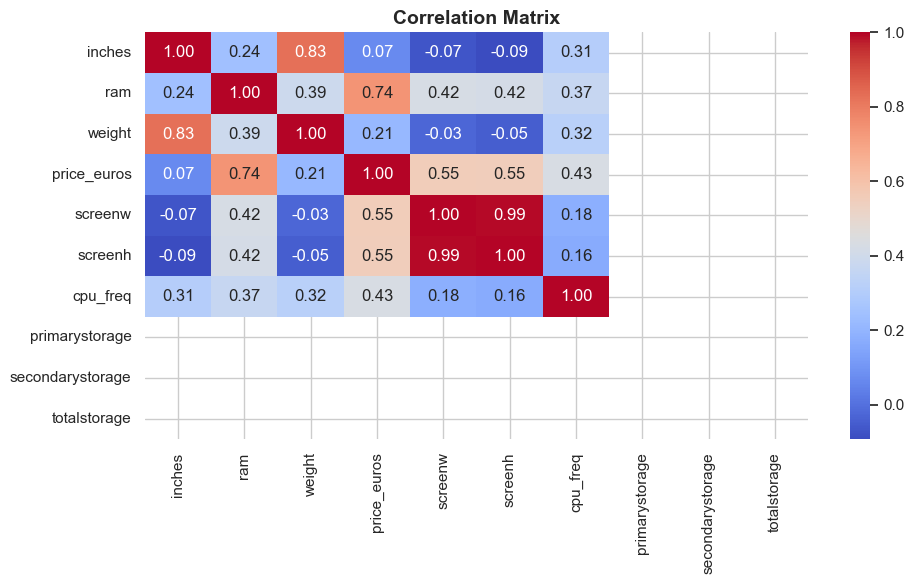

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

##  Price vs Influential Features

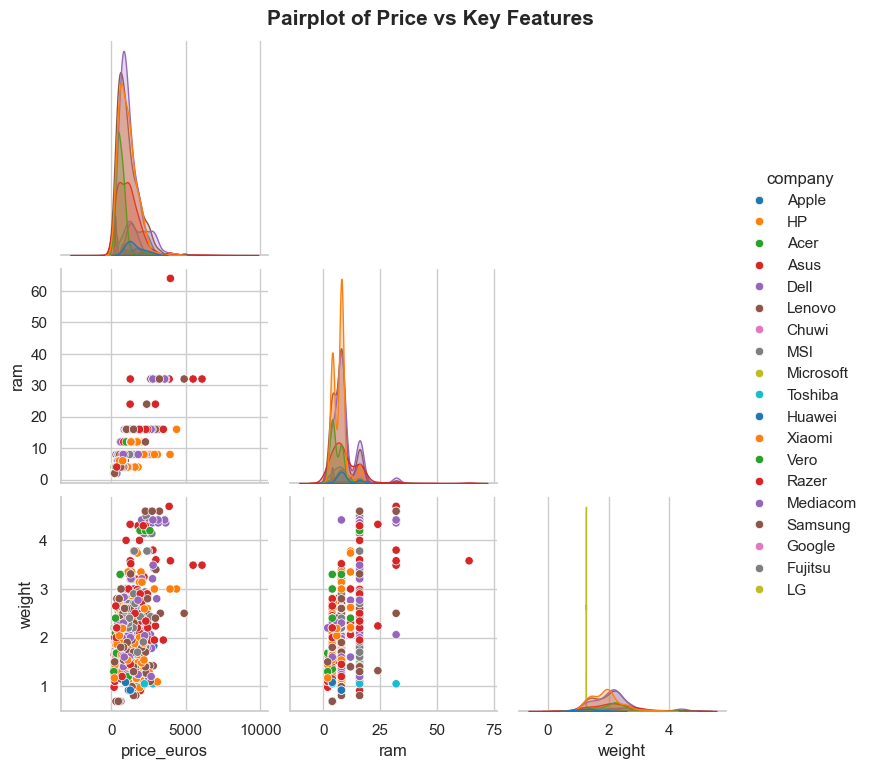

In [ ]:

sns.pairplot(df, vars=['price_euros', 'ram', 'weight'], hue='company', corner=True, palette='tab10')
plt.suptitle("Pairplot of Price vs Key Features", y=1.02, fontsize=15, weight='bold')
plt.show()

**Insight:** Most laptops are Windows-based. Apple laptops tend to have higher prices. RAM is positively correlated with price.